In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Ingestion

In [33]:
# Set your folder path
folder_path = '/Users/pratiibhas/Desktop/Thesis/Stk-data/BHARTIRTL'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Read and concatenate all CSV files into one DataFrame
df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Now combined_df contains all your data
print(combined_df.head())

         Date  series      OPEN      HIGH       LOW  PREV. CLOSE       ltp   \
0  29-Dec-2023      EQ  1,033.15  1,043.25  1,024.40     1,036.70  1,030.00   
1  28-Dec-2023      EQ  1,023.90  1,041.95  1,022.20     1,021.20  1,037.50   
2  27-Dec-2023      EQ  1,000.00  1,024.05    998.00       999.85  1,020.05   
3  26-Dec-2023      EQ    995.00  1,002.50    989.65       989.55  1,000.00   
4  22-Dec-2023      EQ    981.90    998.95    975.55       977.90    989.65   

     close      vwap     52W H  52W L     VOLUME              VALUE   \
0  1,032.20  1,032.66  1,045.95  735.8  46,31,749  4,78,30,23,734.80   
1  1,036.70  1,031.76  1,045.95  735.8  52,88,328  5,45,62,90,114.85   
2  1,021.20  1,013.91  1,045.95  735.8  47,91,379  4,85,80,18,548.75   
3    999.85    998.13  1,045.95  735.8  24,60,643  2,45,60,39,268.45   
4    989.55    990.12  1,045.95  735.8  46,05,120  4,55,96,29,305.35   

  No of trades   
0      2,38,740  
1      1,79,578  
2      1,36,464  
3      1,07,740  
4 

In [34]:
combined_df['Date '] = pd.to_datetime(combined_df['Date '], errors='coerce')
combined_df = combined_df.sort_values('Date ')
print(combined_df.head())
print(combined_df['Date '].min(), combined_df['Date '].max())


          Date  series    OPEN   HIGH     LOW  PREV. CLOSE     ltp   close   \
1918 2018-01-01      EQ   531.0  538.1   525.4       529.65  527.95   527.9   
1917 2018-01-02      EQ   532.9  532.9  511.85        527.9   516.7  516.55   
1916 2018-01-03      EQ  519.15  525.5  514.75       516.55  516.75   518.2   
1915 2018-01-04      EQ   519.0  527.2   514.5        518.2   523.9   523.0   
1914 2018-01-05      EQ   525.0  542.5  518.55        523.0   539.9   540.0   

       vwap  52W H   52W L     VOLUME              VALUE  No of trades   
1918  532.51  564.8  299.15  43,33,190  2,30,74,86,229.50        35,087  
1917  521.44  564.8  299.15  47,24,570  2,46,35,56,274.15        52,103  
1916  521.37  564.8  299.15  57,07,905  2,97,59,47,483.55        47,040  
1915   520.7  564.8  299.15  53,66,018  2,79,41,01,405.15        60,595  
1914  534.11  564.8  299.15  72,18,024  3,85,52,51,256.05        94,131  
2018-01-01 00:00:00 2025-09-26 00:00:00


In [35]:
df = combined_df.copy()
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
1918,2018-01-01,EQ,531.0,538.1,525.4,529.65,527.95,527.9,532.51,564.8,299.15,"43,33,190","2,30,74,86,229.50","35,087"
1917,2018-01-02,EQ,532.9,532.9,511.85,527.9,516.7,516.55,521.44,564.8,299.15,"47,24,570","2,46,35,56,274.15","52,103"
1916,2018-01-03,EQ,519.15,525.5,514.75,516.55,516.75,518.2,521.37,564.8,299.15,"57,07,905","2,97,59,47,483.55","47,040"
1915,2018-01-04,EQ,519.0,527.2,514.5,518.2,523.9,523.0,520.7,564.8,299.15,"53,66,018","2,79,41,01,405.15","60,595"
1914,2018-01-05,EQ,525.0,542.5,518.55,523.0,539.9,540.0,534.11,564.8,299.15,"72,18,024","3,85,52,51,256.05","94,131"


In [36]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

## Basic EDA

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1919 entries, 1918 to 1243
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1919 non-null   datetime64[ns]
 1   series         1919 non-null   object        
 2   OPEN           1919 non-null   object        
 3   HIGH           1919 non-null   object        
 4   LOW            1919 non-null   object        
 5   PREV. CLOSE    1919 non-null   object        
 6   ltp            1919 non-null   object        
 7   close          1919 non-null   object        
 8   vwap           1919 non-null   object        
 9   52W H          1919 non-null   object        
 10  52W L          1919 non-null   object        
 11  VOLUME         1919 non-null   object        
 12  VALUE          1919 non-null   object        
 13  No of trades   1919 non-null   object        
dtypes: datetime64[ns](1), object(13)
memory usage: 224.9+ KB


In [38]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [39]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Make all column names lowercase for consistency (optional)
df.columns = df.columns.str.lower()

# List all columns to convert to float
float_cols = [
    'open', 'high', 'low', 'prev._close',
    'ltp', 'close', 'vwap', '52w_h', '52w_l', 'value'
]

# Remove commas and convert to float
for col in float_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# Convert VOLUME and No_of_trades to integers after removing commas
df['volume'] = pd.to_numeric(df['volume'].astype(str).str.replace(',', ''), errors='coerce').astype('Int64')
df['no_of_trades'] = pd.to_numeric(df['no_of_trades'].astype(str).str.replace(',', ''), errors='coerce').astype('Int64')

# Optionally, convert 'series' to category if few unique values
if df['series'].nunique() < 20:
    df['series'] = df['series'].astype('category')

# Optionally, parse 'Date' column
df['date'] = pd.to_datetime(df['date'], errors='coerce')



In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1919 entries, 1918 to 1243
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1919 non-null   datetime64[ns]
 1   series        1919 non-null   category      
 2   open          1919 non-null   float64       
 3   high          1919 non-null   float64       
 4   low           1919 non-null   float64       
 5   prev._close   1919 non-null   float64       
 6   ltp           1919 non-null   float64       
 7   close         1919 non-null   float64       
 8   vwap          1919 non-null   float64       
 9   52w_h         1919 non-null   float64       
 10  52w_l         1919 non-null   float64       
 11  volume        1919 non-null   Int64         
 12  value         1919 non-null   float64       
 13  no_of_trades  1919 non-null   Int64         
dtypes: Int64(2), category(1), datetime64[ns](1), float64(10)
memory usage: 215.6 KB


### Checking timeline of data

In [41]:
df['date'].min(),df['date'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2025-09-26 00:00:00'))

## Extracting Year, Month and Year-Month from Date

In [42]:
df['Year']= pd.DatetimeIndex(df['date']).year
df['Month'] = pd.DatetimeIndex(df['date']).month
df['Year-Month'] = df['date'].dt.strftime('%Y-%b')

In [43]:
df.head()

,date,series,open,high,low,prev._close,ltp,close,vwap,52w_h,52w_l,volume,value,no_of_trades,Year,Month,Year-Month
1918,2018-01-01,EQ,531.00,538.1,525.40,529.65,527.95,527.90,532.51,564.8,299.15,4333190,2.307486e+09,35087,2018,1,2018-Jan
1917,2018-01-02,EQ,532.90,532.9,511.85,527.90,516.70,516.55,521.44,564.8,299.15,4724570,2.463556e+09,52103,2018,1,2018-Jan
1916,2018-01-03,EQ,519.15,525.5,514.75,516.55,516.75,518.20,521.37,564.8,299.15,5707905,2.975947e+09,47040,2018,1,2018-Jan
1915,2018-01-04,EQ,519.00,527.2,514.50,518.20,523.90,523.00,520.70,564.8,299.15,5366018,2.794101e+09,60595,2018,1,2018-Jan
1914,2018-01-05,EQ,525.00,542.5,518.55,523.00,539.90,540.00,534.11,564.8,299.15,7218024,3.855251e+09,94131,2018,1,2018-Jan


## Visualizations

## Volume

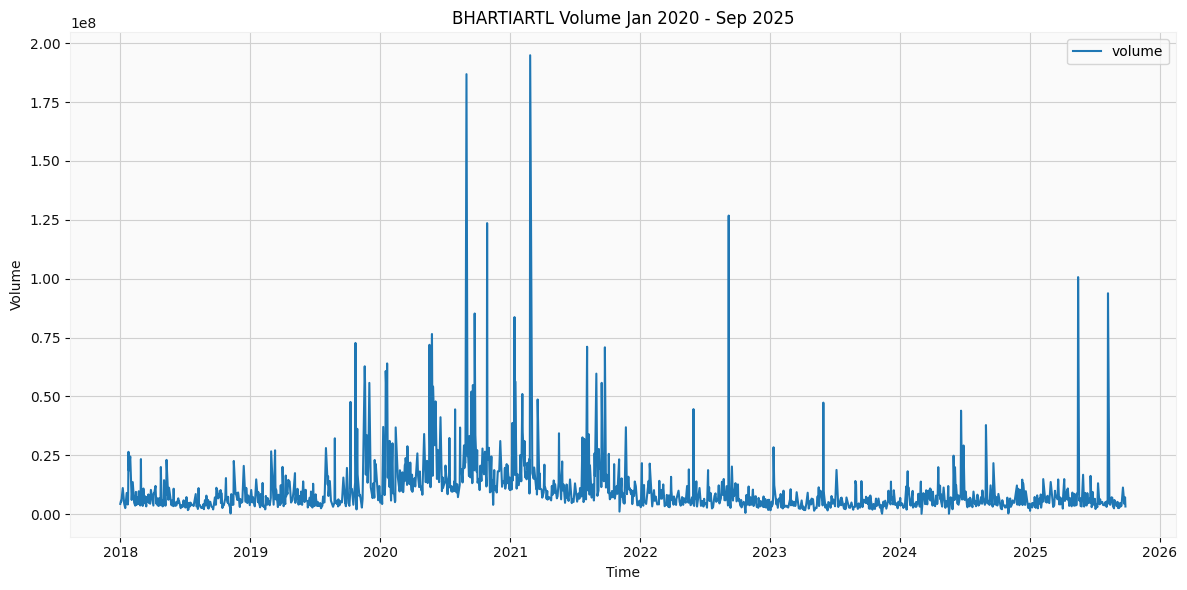

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['volume'], label='volume')
plt.title('BHARTIARTL Volume Jan 2020 - Sep 2025')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Plotting for specific Month and Year (Volume)

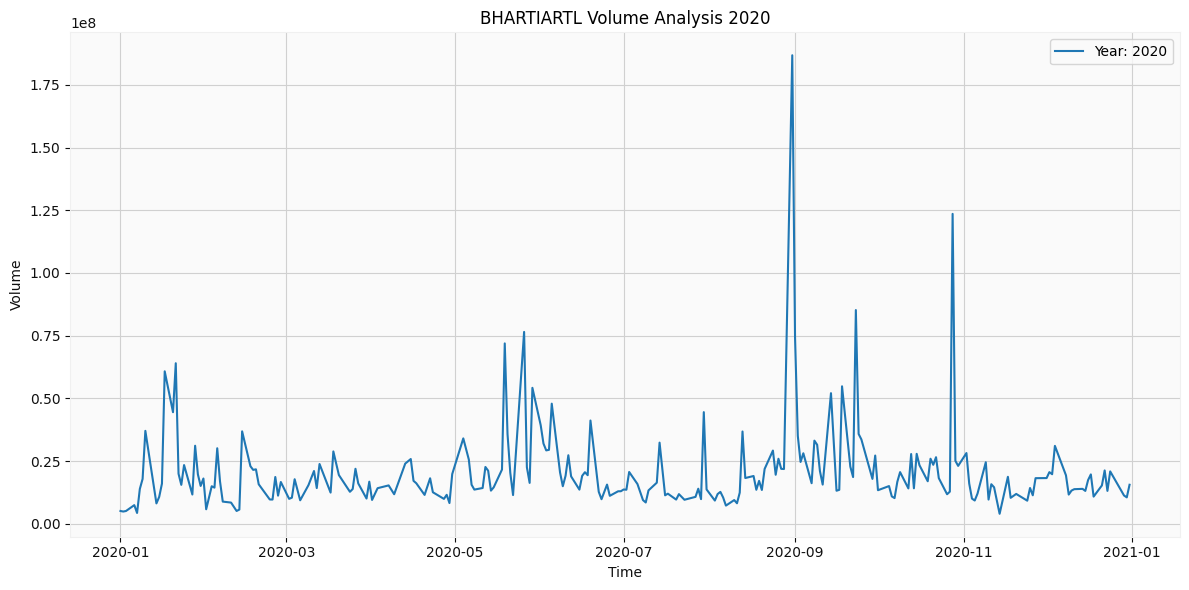

In [45]:

# Input year and month
year = int(input('Enter the year for which you want to plot: '))
month = int(input('Enter the month for which you want to plot (1-12): '))

# Filter data for given year and month
df_specific_year = df[df['Year'] == year]
df_specific_month = df_specific_year[df_specific_year['Month'] == month]

# Plotting for specific year
plt.figure(figsize=(12, 6))
plt.plot(df_specific_year['date'],df_specific_year['volume'], label=f'Year: {year}')
plt.title(f'BHARTIARTL Volume Analysis {year}')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



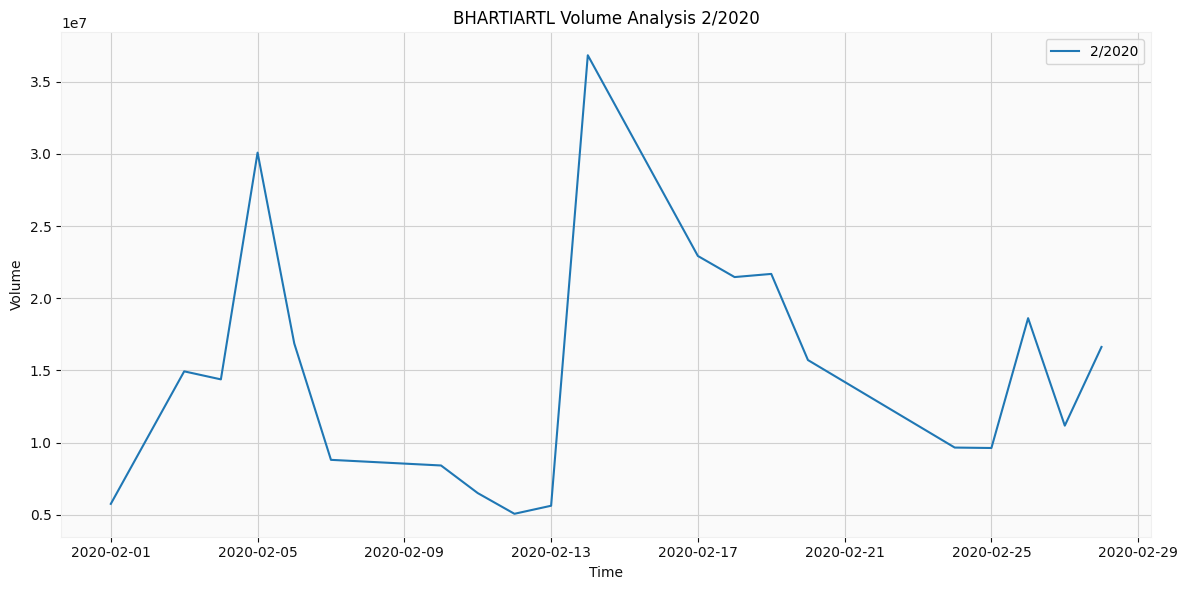

In [46]:
# Plotting for specific month within year
plt.figure(figsize=(12, 6))
plt.plot(df_specific_month['date'], df_specific_month['volume'], label=f'{month}/{year}')
plt.title(f'BHARTIARTL Volume Analysis {month}/{year}')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Open , Close

In [47]:
df.columns

Index(['date', 'series', 'open', 'high', 'low', 'prev._close', 'ltp', 'close',
       'vwap', '52w_h', '52w_l', 'volume', 'value', 'no_of_trades', 'Year',
       'Month', 'Year-Month'],
      dtype='object')

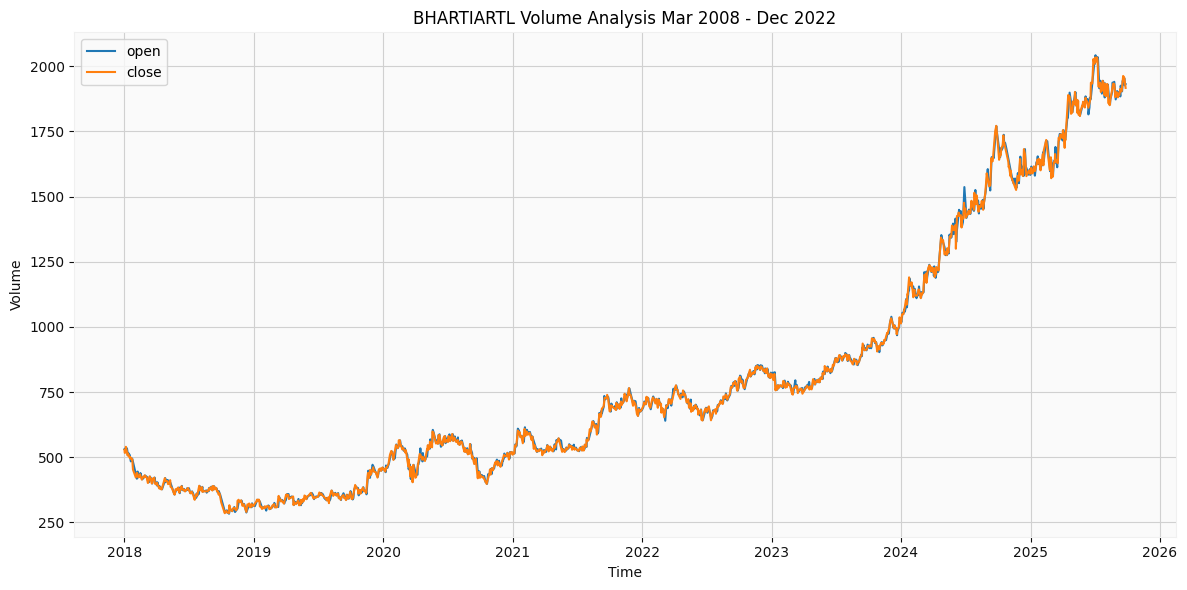

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df[['open','close']], label=['open','close'])
plt.title('BHARTIARTL Volume Analysis Mar 2008 - Dec 2022')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Plotting for specific year and month

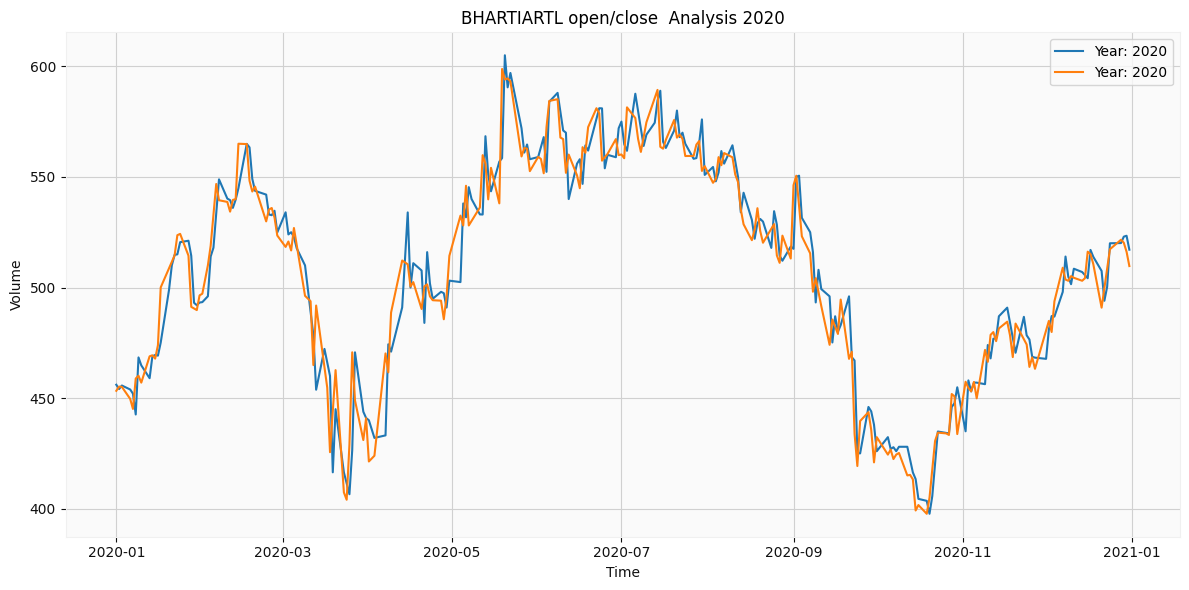

In [49]:
# Input year and month
year = int(input('Enter the year for which you want to plot: '))
month = int(input('Enter the month for which you want to plot (1-12): '))

# Filter data for given year and month
df_specific_year = df[df['Year'] == year]
df_specific_month = df_specific_year[df_specific_year['Month'] == month]

# Plotting for specific year
plt.figure(figsize=(12, 6))
plt.plot(df_specific_year['date'],df_specific_year[['open','close']], label=f'Year: {year}')
plt.title(f'BHARTIARTL open/close  Analysis {year}')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

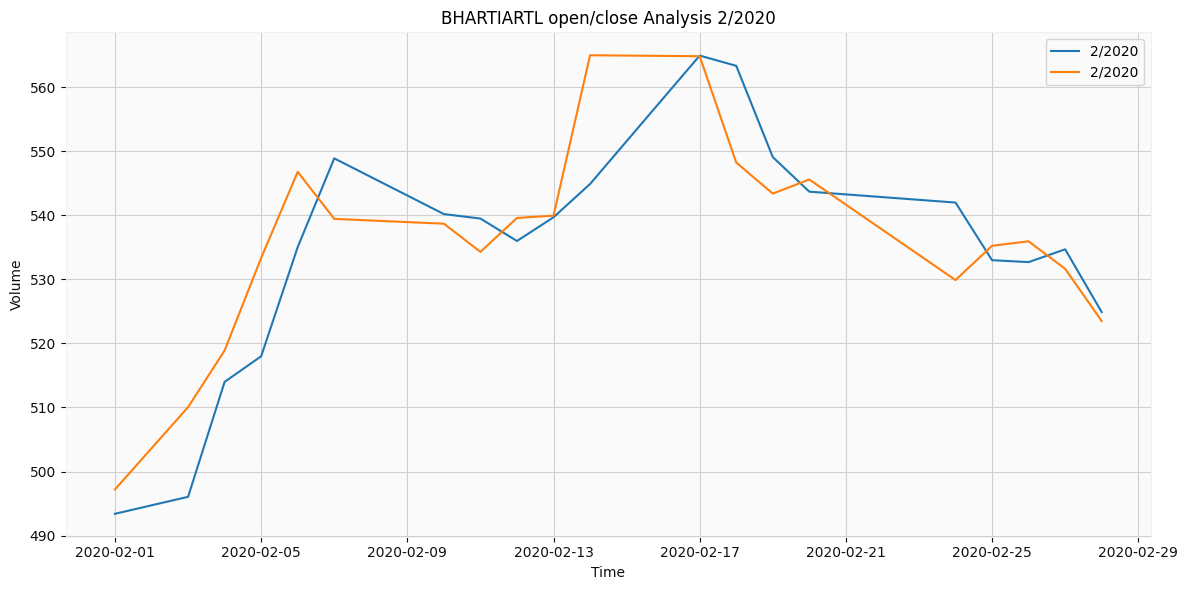

In [50]:
# Plotting for specific month within year
plt.figure(figsize=(12, 6))
plt.plot(df_specific_month['date'], df_specific_month[['open','close']], label=f'{month}/{year}')
plt.title(f'BHARTIARTL open/close Analysis {month}/{year}')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## High, low

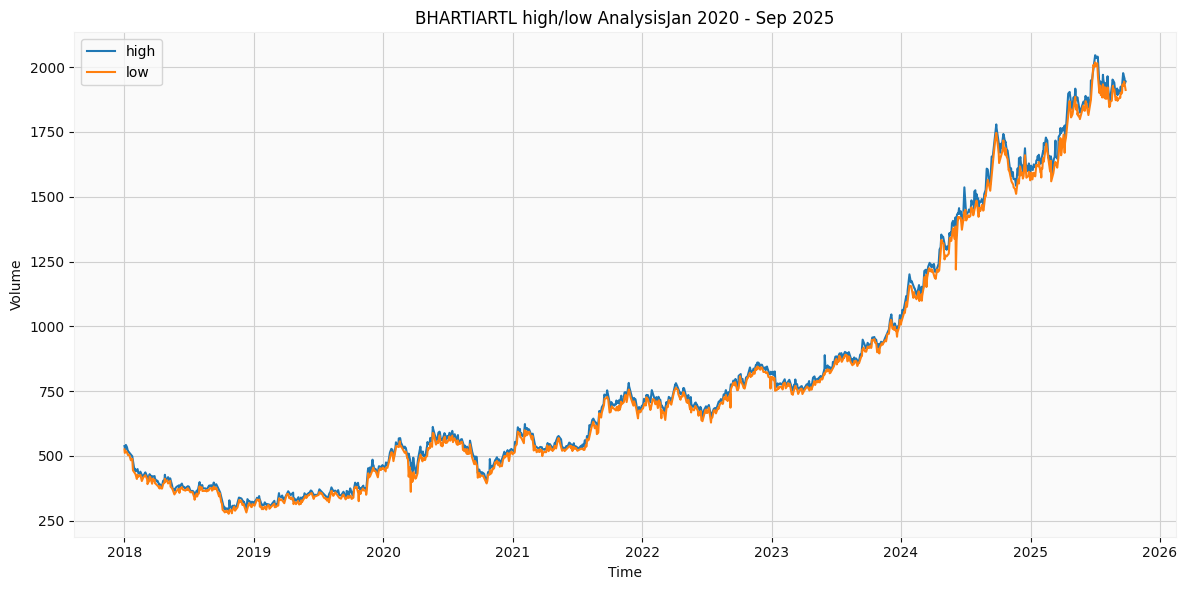

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df[['high','low']], label=['high','low'])
plt.title('BHARTIARTL high/low AnalysisJan 2020 - Sep 2025')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

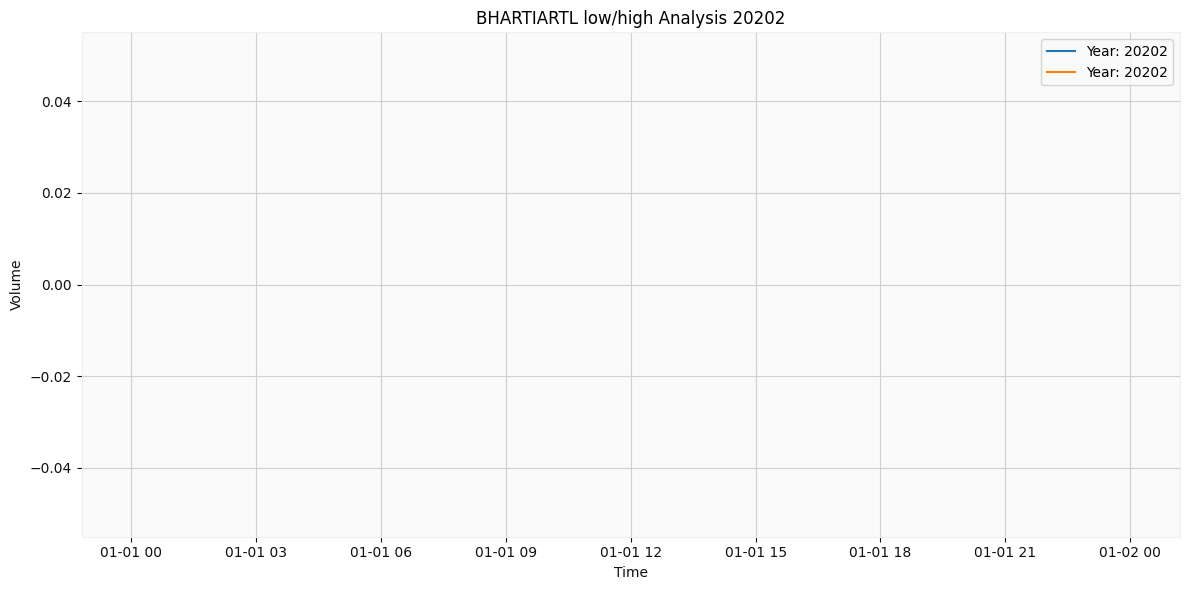

In [52]:
# Input year and month
year = int(input('Enter the year for which you want to plot: '))
month = int(input('Enter the month for which you want to plot (1-12): '))

# Filter data for given year and month
df_specific_year = df[df['Year'] == year]
df_specific_month = df_specific_year[df_specific_year['Month'] == month]

# Plotting for specific year
plt.figure(figsize=(12, 6))
plt.plot(df_specific_year['date'],df_specific_year[['high','low']], label=f'Year: {year}')
plt.title(f'BHARTIARTL low/high Analysis {year}')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

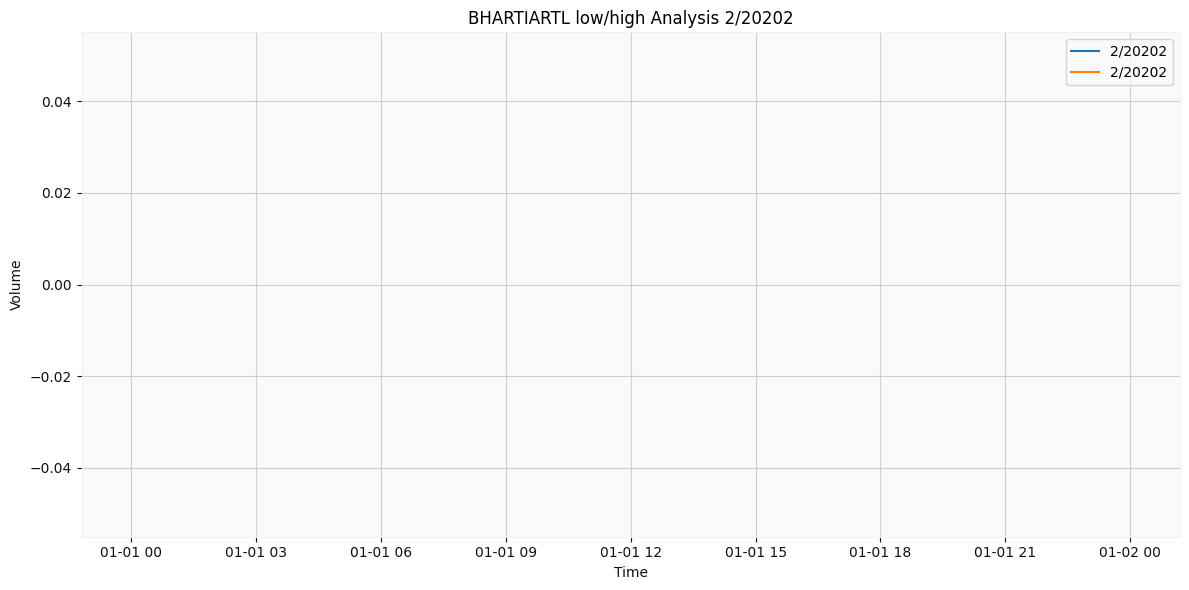

In [53]:
# Plotting for specific month within year
plt.figure(figsize=(12, 6))
plt.plot(df_specific_month['date'], df_specific_month[['high','low']], label=f'{month}/{year}')
plt.title(f'BHARTIARTL low/high Analysis {month}/{year}')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## CandleSticks

In [54]:
df['volume'] = df['volume'].astype('int64')


In [55]:
df.columns

Index(['date', 'series', 'open', 'high', 'low', 'prev._close', 'ltp', 'close',
       'vwap', '52w_h', '52w_l', 'volume', 'value', 'no_of_trades', 'Year',
       'Month', 'Year-Month'],
      dtype='object')

In [56]:
df.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
}, inplace=True)


In [57]:
# Check column names exactly
print("Columns before set_index:", df.columns.tolist())

# Clean column names
df.columns = df.columns.str.strip()

# Check again after cleaning
print("Columns after stripping spaces:", df.columns.tolist())

# Now set the index using the correct column name as detected, e.g.:
if 'date' in df.columns:
    df.set_index('date', inplace=True)
elif 'Date' in df.columns:
    df.set_index('Date', inplace=True)
else:
    raise KeyError("No 'date' or 'Date' column found to set as index.")

# Convert volume to int64
df['Volume'] = df['Volume'].fillna(0).astype('int64')


Columns before set_index: ['date', 'series', 'Open', 'High', 'Low', 'prev._close', 'ltp', 'Close', 'vwap', '52w_h', '52w_l', 'Volume', 'value', 'no_of_trades', 'Year', 'Month', 'Year-Month']
Columns after stripping spaces: ['date', 'series', 'Open', 'High', 'Low', 'prev._close', 'ltp', 'Close', 'vwap', '52w_h', '52w_l', 'Volume', 'value', 'no_of_trades', 'Year', 'Month', 'Year-Month']


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


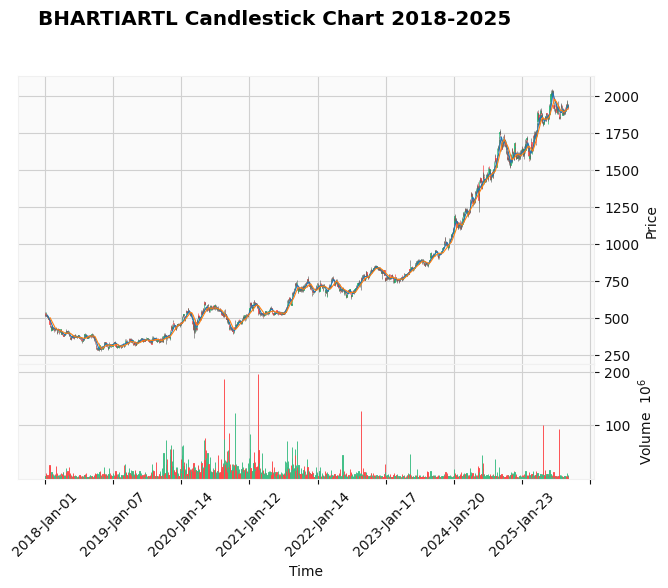

In [58]:
# Now plot
import mplfinance as mpf
mpf.plot(df, type='candle', style='yahoo',
         title='BHARTIARTL Candlestick Chart 2018-2025',
         volume=True,
         mav=(10, 20),
         ylabel='Price',
         xlabel='Time',
         show_nontrading=False)


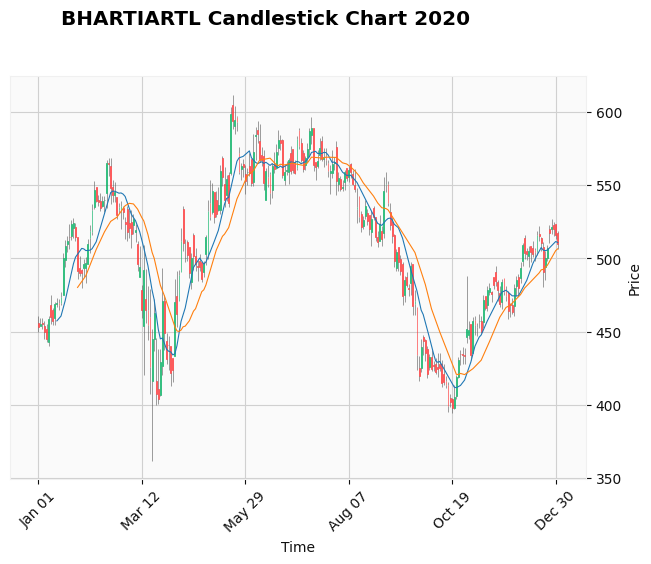

In [59]:
# Input for specific year
year = int(input('Enter the year for which you want to plot: '))
df_specific_year = df[df.index.year == year]

mpf.plot(df_specific_year, type='candle', style='yahoo',
         title=f'BHARTIARTL Candlestick Chart {year}',
         volume=False,
         mav=(10, 20),
         ylabel='Price',
         xlabel='Time',
         show_nontrading=False)

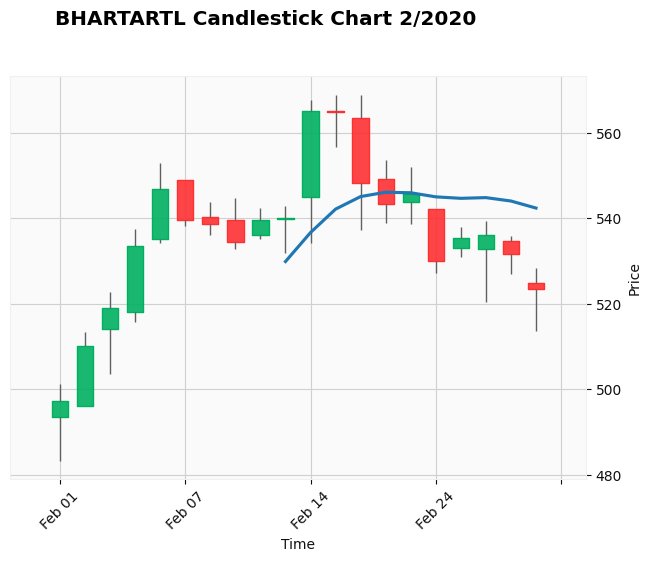

In [60]:
# Input for year and month
year = int(input('Enter the year for which you want to plot: '))
month = int(input('Enter the month for which you want to plot (1-12): '))
df_specific_month = df[(df.index.year == year) & (df.index.month == month)]

mpf.plot(df_specific_month, type='candle', style='yahoo',
         title=f'BHARTARTL Candlestick Chart {month}/{year}',
         volume=False,
         mav=(10, 20),
         ylabel='Price',
         xlabel='Time',
         show_nontrading=False)


## High-Low & Open-Close Analysis

### A Macro View

Conclsuion:
- Overall Trend

-  Momentum


- Volatility

- Market sentiment

In [61]:
df.head()

,series,Open,High,Low,prev._close,ltp,Close,vwap,52w_h,52w_l,Volume,value,no_of_trades,Year,Month,Year-Month
date,,,,,,,,,,,,,,,,
2018-01-01,EQ,531.00,538.1,525.40,529.65,527.95,527.90,532.51,564.8,299.15,4333190,2.307486e+09,35087,2018,1,2018-Jan
2018-01-02,EQ,532.90,532.9,511.85,527.90,516.70,516.55,521.44,564.8,299.15,4724570,2.463556e+09,52103,2018,1,2018-Jan
2018-01-03,EQ,519.15,525.5,514.75,516.55,516.75,518.20,521.37,564.8,299.15,5707905,2.975947e+09,47040,2018,1,2018-Jan
2018-01-04,EQ,519.00,527.2,514.50,518.20,523.90,523.00,520.70,564.8,299.15,5366018,2.794101e+09,60595,2018,1,2018-Jan
2018-01-05,EQ,525.00,542.5,518.55,523.00,539.90,540.00,534.11,564.8,299.15,7218024,3.855251e+09,94131,2018,1,2018-Jan


## Gap Up-Gap Down DataFrame

In [62]:
df['Points_Change_Prev_Close'] = df['Open']-df['prev._close']

df.head()

,series,Open,High,Low,prev._close,ltp,Close,vwap,52w_h,52w_l,Volume,value,no_of_trades,Year,Month,Year-Month,Points_Change_Prev_Close
date,,,,,,,,,,,,,,,,,
2018-01-01,EQ,531.00,538.1,525.40,529.65,527.95,527.90,532.51,564.8,299.15,4333190,2.307486e+09,35087,2018,1,2018-Jan,1.35
2018-01-02,EQ,532.90,532.9,511.85,527.90,516.70,516.55,521.44,564.8,299.15,4724570,2.463556e+09,52103,2018,1,2018-Jan,5.00
2018-01-03,EQ,519.15,525.5,514.75,516.55,516.75,518.20,521.37,564.8,299.15,5707905,2.975947e+09,47040,2018,1,2018-Jan,2.60
2018-01-04,EQ,519.00,527.2,514.50,518.20,523.90,523.00,520.70,564.8,299.15,5366018,2.794101e+09,60595,2018,1,2018-Jan,0.80
2018-01-05,EQ,525.00,542.5,518.55,523.00,539.90,540.00,534.11,564.8,299.15,7218024,3.855251e+09,94131,2018,1,2018-Jan,2.00


In [63]:
df['Per_Change_Prev_Close'] = round(((df['Open']-df['prev._close'])/df['prev._close'])*100, 4)

df.head()

,series,Open,High,Low,prev._close,ltp,Close,vwap,52w_h,52w_l,Volume,value,no_of_trades,Year,Month,Year-Month,Points_Change_Prev_Close,Per_Change_Prev_Close
date,,,,,,,,,,,,,,,,,,
2018-01-01,EQ,531.00,538.1,525.40,529.65,527.95,527.90,532.51,564.8,299.15,4333190,2.307486e+09,35087,2018,1,2018-Jan,1.35,0.2549
2018-01-02,EQ,532.90,532.9,511.85,527.90,516.70,516.55,521.44,564.8,299.15,4724570,2.463556e+09,52103,2018,1,2018-Jan,5.00,0.9471
2018-01-03,EQ,519.15,525.5,514.75,516.55,516.75,518.20,521.37,564.8,299.15,5707905,2.975947e+09,47040,2018,1,2018-Jan,2.60,0.5033
2018-01-04,EQ,519.00,527.2,514.50,518.20,523.90,523.00,520.70,564.8,299.15,5366018,2.794101e+09,60595,2018,1,2018-Jan,0.80,0.1544
2018-01-05,EQ,525.00,542.5,518.55,523.00,539.90,540.00,534.11,564.8,299.15,7218024,3.855251e+09,94131,2018,1,2018-Jan,2.00,0.3824


Defining Gap Up-Gap Down

- **Gap Up:** Percentage Change from Previous Close greater than 1 %

- **Gap Down:** Percentage Change from Previous Close less than -1 %



In [64]:
gap_up_down_df = df[(df['Per_Change_Prev_Close']<(-1)) | (df['Per_Change_Prev_Close']>(1))]

gap_up_down_df

,series,Open,High,Low,prev._close,ltp,Close,vwap,52w_h,52w_l,Volume,value,no_of_trades,Year,Month,Year-Month,Points_Change_Prev_Close,Per_Change_Prev_Close
date,,,,,,,,,,,,,,,,,,
2018-01-08,EQ,534.15,534.15,514.20,540.0,516.00,516.35,519.80,564.8,305.00,11074508,5.756512e+09,100112,2018,1,2018-Jan,-5.85,-1.0833
2018-01-10,EQ,515.00,517.50,504.30,509.8,506.30,506.40,510.06,564.8,305.00,6008949,3.064896e+09,55629,2018,1,2018-Jan,5.20,1.0200
2018-01-19,EQ,484.00,500.25,483.50,495.0,498.05,497.90,493.25,564.8,305.00,8982201,4.430452e+09,87034,2018,1,2018-Jan,-11.00,-2.2222
2018-01-24,EQ,486.90,487.00,455.15,492.1,456.55,459.50,468.50,564.8,305.00,26450900,1.239224e+10,194374,2018,1,2018-Jan,-5.20,-1.0567
2018-01-29,EQ,444.00,446.40,435.05,452.7,440.60,440.60,440.41,564.8,322.10,24459885,1.077240e+10,210875,2018,1,2018-Jan,-8.70,-1.9218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-13,EQ,1815.00,1844.60,1815.00,1844.2,1840.10,1840.40,1837.79,1917.0,1372.85,4613000,8.477735e+09,178295,2025,6,2025-Jun,-29.20,-1.5833
2025-07-11,EQ,1942.00,1959.10,1914.20,1964.5,1925.70,1921.90,1924.82,2045.8,1421.45,13103980,2.522283e+10,203449,2025,7,2025-Jul,-22.50,-1.1453
2025-07-31,EQ,1913.00,1926.50,1895.60,1932.6,1912.00,1914.30,1914.01,2045.8,1422.60,4674966,8.947909e+09,139087,2025,7,2025-Jul,-19.60,-1.0142


### Total Gap Up and Gap Down 

In [65]:
gap_up_down_df.reset_index(inplace= True)

In [66]:
gap_up_down_status = ['']*len(gap_up_down_df['date'])
len(gap_up_down_status)

268

In [67]:
for row_no in range(0,len(gap_up_down_df['date'])):
    if gap_up_down_df.iloc[row_no]['Per_Change_Prev_Close']>(1):
        gap_up_down_status[row_no] = 'Gap Up'
        
    else:
        gap_up_down_status[row_no] ='Gap Down'

    
gap_up_down_df['gap_up_down_status'] = gap_up_down_status

gap_up_down_df

/var/folders/1q/dnpwvw112w7bxtjst50whx0r0000gn/T/ipykernel_4831/40164578.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap_up_down_df['gap_up_down_status'] = gap_up_down_status


,date,series,Open,High,Low,prev._close,ltp,Close,vwap,52w_h,52w_l,Volume,value,no_of_trades,Year,Month,Year-Month,Points_Change_Prev_Close,Per_Change_Prev_Close,gap_up_down_status
0,2018-01-08,EQ,534.15,534.15,514.20,540.0,516.00,516.35,519.80,564.8,305.00,11074508,5.756512e+09,100112,2018,1,2018-Jan,-5.85,-1.0833,Gap Down
1,2018-01-10,EQ,515.00,517.50,504.30,509.8,506.30,506.40,510.06,564.8,305.00,6008949,3.064896e+09,55629,2018,1,2018-Jan,5.20,1.0200,Gap Up
2,2018-01-19,EQ,484.00,500.25,483.50,495.0,498.05,497.90,493.25,564.8,305.00,8982201,4.430452e+09,87034,2018,1,2018-Jan,-11.00,-2.2222,Gap Down
3,2018-01-24,EQ,486.90,487.00,455.15,492.1,456.55,459.50,468.50,564.8,305.00,26450900,1.239224e+10,194374,2018,1,2018-Jan,-5.20,-1.0567,Gap Down
4,2018-01-29,EQ,444.00,446.40,435.05,452.7,440.60,440.60,440.41,564.8,322.10,24459885,1.077240e+10,210875,2018,1,2018-Jan,-8.70,-1.9218,Gap Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2025-06-13,EQ,1815.00,1844.60,1815.00,1844.2,1840.10,1840.40,1837.79,1917.0,1372.85,4613000,8.477735e+09,178295,2025,6,2025-Jun,-29.20,-1.5833,Gap Down
264,2025-07-11,EQ,1942.00,1959.10,1914.20,1964.5,1925.70,1921.90,1924.82,2045.8,1421.45,13103980,2.522283e+10,203449,2025,7,2025-Jul,-22.50,-1.1453,Gap Down
265,2025-07-31,EQ,1913.00,1926.50,1895.60,1932.6,1912.00,1914.30,1914.01,2045.8,1422.60,4674966,8.947909e+09,139087,2025,7,2025-Jul,-19.60,-1.0142,Gap Down
266,2025-08-08,EQ,1886.30,1893.80,1856.00,1922.6,1859.50,1858.60,1871.02,2045.8,1422.60,93801105,1.755037e+11,247592,2025,8,2025-Aug,-36.30,-1.8881,Gap Down


## Gapup -down monthly analysis

In [68]:
gap_up_down_days_monthly = gap_up_down_df.groupby(['Month', 'gap_up_down_status'])['gap_up_down_status'].count()

gap_up_down_days_monthly

Month  gap_up_down_status
1      Gap Down               7
       Gap Up                14
2      Gap Down              11
       Gap Up                14
3      Gap Down              17
       Gap Up                20
4      Gap Down              10
       Gap Up                20
5      Gap Down              12
       Gap Up                18
6      Gap Down               6
       Gap Up                11
7      Gap Down               5
       Gap Up                13
8      Gap Down               8
       Gap Up                 7
9      Gap Down               8
       Gap Up                10
10     Gap Down               7
       Gap Up                10
11     Gap Down               9
       Gap Up                16
12     Gap Down               5
       Gap Up                10
Name: gap_up_down_status, dtype: int64

In [69]:
gap_up_down_days_monthly = gap_up_down_df.groupby(['Month', 'gap_up_down_status'])['gap_up_down_status'].count().unstack()
gap_up_down_days_monthly_df = pd.DataFrame(gap_up_down_days_monthly)

gap_up_down_days_monthly_df.columns.name = None

gap_up_down_days_monthly_df = gap_up_down_days_monthly_df.reset_index()

gap_up_down_days_monthly_df

,Month,Gap Down,Gap Up
0,1,7,14
1,2,11,14
2,3,17,20
3,4,10,20
4,5,12,18
5,6,6,11
6,7,5,13
7,8,8,7
8,9,8,10
9,10,7,10


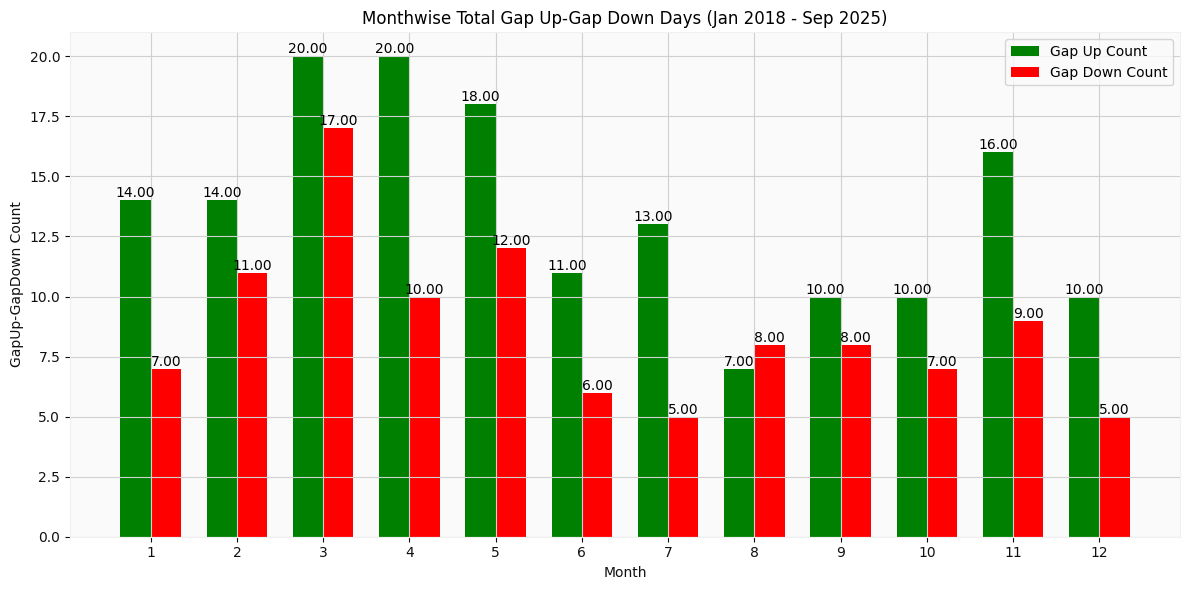

In [70]:
import matplotlib.pyplot as plt
import numpy as np

months = gap_up_down_days_monthly_df['Month']
gap_up = gap_up_down_days_monthly_df['Gap Up'].values.round(2)
gap_down = gap_up_down_days_monthly_df['Gap Down'].values.round(2)

x = np.arange(len(months))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12, 6))
bars_up = ax.bar(x - width/2, gap_up, width, label='Gap Up Count', color='green')
bars_down = ax.bar(x + width/2, gap_down, width, label='Gap Down Count', color='red')

# Add text labels on bars
def add_labels(bars, values):
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{val:.2f}',
                ha='center', va='bottom')

add_labels(bars_up, gap_up)
add_labels(bars_down, gap_down)

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('GapUp-GapDown Count')
ax.set_title('Monthwise Total Gap Up-Gap Down Days (Jan 2018 - Sep 2025)')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

plt.tight_layout()
plt.show()


## Gap Up-Gap Down Yearly Analysis

In [71]:
gap_up_down_days_yearly = gap_up_down_df.groupby(['Year', 'gap_up_down_status'])['gap_up_down_status'].count().unstack()
gap_up_down_days_yearly = gap_up_down_days_yearly.fillna(0)
gap_up_down_days_yearly_df = pd.DataFrame(gap_up_down_days_yearly)

gap_up_down_days_yearly_df.columns.name = None

gap_up_down_days_yearly_df = gap_up_down_days_yearly_df.reset_index()

gap_up_down_days_yearly_df


,Year,Gap Down,Gap Up
0,2018,22,20
1,2019,15,22
2,2020,18,41
3,2021,8,23
4,2022,19,19
5,2023,6,9
6,2024,8,19
7,2025,9,10


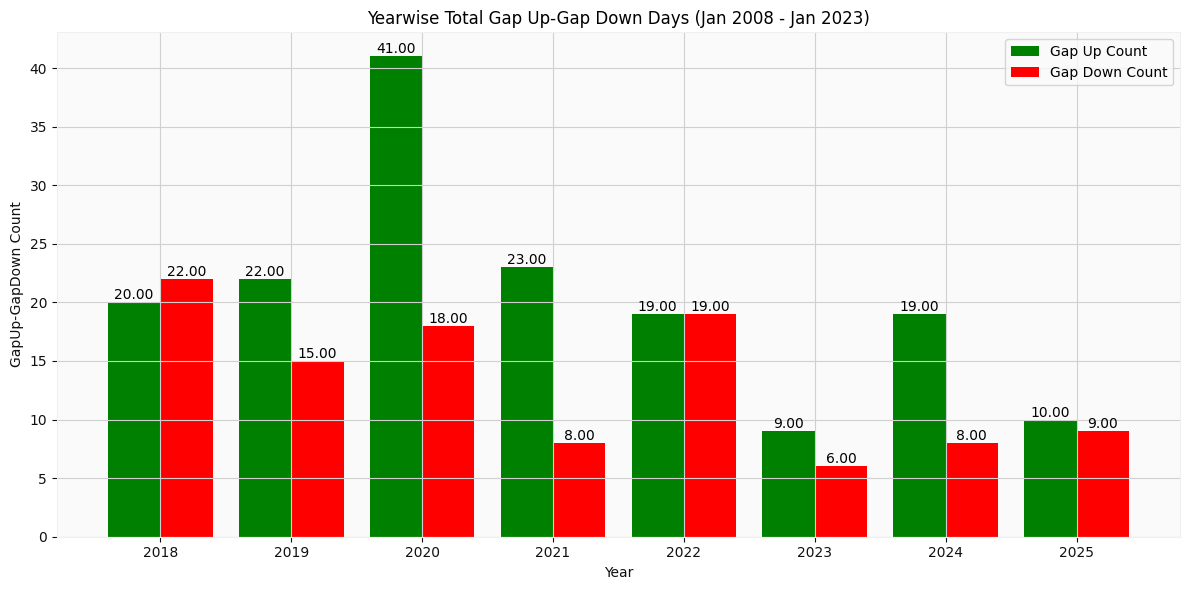

In [72]:
years = gap_up_down_days_yearly_df['Year']
gap_up = gap_up_down_days_yearly_df['Gap Up'].values.round(2)
gap_down = gap_up_down_days_yearly_df['Gap Down'].values.round(2)

x = np.arange(len(years))  # label locations
width = 0.4  # bar width

fig, ax = plt.subplots(figsize=(12, 6))
bars_up = ax.bar(x - width/2, gap_up, width, label='Gap Up Count', color='green')
bars_down = ax.bar(x + width/2, gap_down, width, label='Gap Down Count', color='red')

# Add text labels on bars
def add_labels(bars, values):
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{val:.2f}',
                ha='center', va='bottom')

add_labels(bars_up, gap_up)
add_labels(bars_down, gap_down)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('GapUp-GapDown Count')
ax.set_title('Yearwise Total Gap Up-Gap Down Days (Jan 2008 - Jan 2023)')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

plt.tight_layout()
plt.show()

# Correlation with events

In [73]:
# Set your folder path
folder_path = '/Users/pratiibhas/Desktop/Thesis/events dataset'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Read and concatenate all CSV files into one DataFrame
df_list = [pd.read_csv(os.path.join(folder_path, file), encoding='latin1') for file in csv_files]
events_df = pd.concat(df_list, ignore_index=True)
events_df

,date,heading,main_content,location,url,Unnamed: 5,region
0,1/6/2022,"Kazakhstan unrest: From Russia to US, the worl...",Unrest in Kazakhstan has attracted the attenti...,Kazakhstan,https://www.aljazeera.com/news/2022/1/6/kazakh...,NaN,NaN
1,1/5/2022,Kazakhstan protests: Moscow-led alliance sends...,Peacekeeping forces from a Russia-led milita...,Kazakhstan,https://www.theguardian.com/world/2022/jan/05/...,NaN,NaN
2,3/9/2022,Russia-Ukraine crisis updates March 08 2022,Ukraine President Volodymyr Zelenskyy said he ...,Global,https://www.thehindu.com/news/international/uk...,NaN,NaN
3,12/30/2022,"Inflation, tech plunge and crypto winter: gl...",Investors are reeling from the worst year in g...,Not Found,https://www.theguardian.com/business/2022/dec/...,NaN,NaN
4,7/7/2022,"Scandal-ridden Boris Johnson resigns, remains ...",British Prime Minister Boris Johnson resigned ...,Not Found,https://indianexpress.com/article/world/uk-pri...,NaN,NaN
...,...,...,...,...,...,...,...
167,1/17/2025,UN says Sudan war turning 'more dangerous' for...,The United Nations human rights chief warned F...,Sudan,https://www.newindianexpress.com/world/2025/Ja...,NaN,NaN
168,1/16/2025,Israel-Hamas ceasefire Updates: Netanyahu accu...,"Two Hamas leaders on Thursday (January 16, 202...",Global,https://www.thehindu.com/news/international/is...,NaN,NaN
169,6/7/2025,Explained: International efforts to end Israel...,The United Nations Security Council (UNSC) on ...,Global,https://indianexpress.com/article/explained/ex...,NaN,NaN
170,6/26/2025,Indian markets hit 2025 highs on geopolitical ...,CHENNAI: The Indian stock market extended its ...,India,https://www.newindianexpress.com/business/2025...,NaN,NaN


In [74]:
events_df.drop(['Unnamed: 5','region'], axis=1, inplace=True) 
events_df

,date,heading,main_content,location,url
0,1/6/2022,"Kazakhstan unrest: From Russia to US, the worl...",Unrest in Kazakhstan has attracted the attenti...,Kazakhstan,https://www.aljazeera.com/news/2022/1/6/kazakh...
1,1/5/2022,Kazakhstan protests: Moscow-led alliance sends...,Peacekeeping forces from a Russia-led milita...,Kazakhstan,https://www.theguardian.com/world/2022/jan/05/...
2,3/9/2022,Russia-Ukraine crisis updates March 08 2022,Ukraine President Volodymyr Zelenskyy said he ...,Global,https://www.thehindu.com/news/international/uk...
3,12/30/2022,"Inflation, tech plunge and crypto winter: gl...",Investors are reeling from the worst year in g...,Not Found,https://www.theguardian.com/business/2022/dec/...
4,7/7/2022,"Scandal-ridden Boris Johnson resigns, remains ...",British Prime Minister Boris Johnson resigned ...,Not Found,https://indianexpress.com/article/world/uk-pri...
...,...,...,...,...,...
167,1/17/2025,UN says Sudan war turning 'more dangerous' for...,The United Nations human rights chief warned F...,Sudan,https://www.newindianexpress.com/world/2025/Ja...
168,1/16/2025,Israel-Hamas ceasefire Updates: Netanyahu accu...,"Two Hamas leaders on Thursday (January 16, 202...",Global,https://www.thehindu.com/news/international/is...
169,6/7/2025,Explained: International efforts to end Israel...,The United Nations Security Council (UNSC) on ...,Global,https://indianexpress.com/article/explained/ex...
170,6/26/2025,Indian markets hit 2025 highs on geopolitical ...,CHENNAI: The Indian stock market extended its ...,India,https://www.newindianexpress.com/business/2025...


In [75]:
# For stock data date format: day/month/year (e.g. 31/12/2023)
stk_df= gap_up_down_df.copy()
stk_df

,date,series,Open,High,Low,prev._close,ltp,Close,vwap,52w_h,52w_l,Volume,value,no_of_trades,Year,Month,Year-Month,Points_Change_Prev_Close,Per_Change_Prev_Close,gap_up_down_status
0,2018-01-08,EQ,534.15,534.15,514.20,540.0,516.00,516.35,519.80,564.8,305.00,11074508,5.756512e+09,100112,2018,1,2018-Jan,-5.85,-1.0833,Gap Down
1,2018-01-10,EQ,515.00,517.50,504.30,509.8,506.30,506.40,510.06,564.8,305.00,6008949,3.064896e+09,55629,2018,1,2018-Jan,5.20,1.0200,Gap Up
2,2018-01-19,EQ,484.00,500.25,483.50,495.0,498.05,497.90,493.25,564.8,305.00,8982201,4.430452e+09,87034,2018,1,2018-Jan,-11.00,-2.2222,Gap Down
3,2018-01-24,EQ,486.90,487.00,455.15,492.1,456.55,459.50,468.50,564.8,305.00,26450900,1.239224e+10,194374,2018,1,2018-Jan,-5.20,-1.0567,Gap Down
4,2018-01-29,EQ,444.00,446.40,435.05,452.7,440.60,440.60,440.41,564.8,322.10,24459885,1.077240e+10,210875,2018,1,2018-Jan,-8.70,-1.9218,Gap Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2025-06-13,EQ,1815.00,1844.60,1815.00,1844.2,1840.10,1840.40,1837.79,1917.0,1372.85,4613000,8.477735e+09,178295,2025,6,2025-Jun,-29.20,-1.5833,Gap Down
264,2025-07-11,EQ,1942.00,1959.10,1914.20,1964.5,1925.70,1921.90,1924.82,2045.8,1421.45,13103980,2.522283e+10,203449,2025,7,2025-Jul,-22.50,-1.1453,Gap Down
265,2025-07-31,EQ,1913.00,1926.50,1895.60,1932.6,1912.00,1914.30,1914.01,2045.8,1422.60,4674966,8.947909e+09,139087,2025,7,2025-Jul,-19.60,-1.0142,Gap Down
266,2025-08-08,EQ,1886.30,1893.80,1856.00,1922.6,1859.50,1858.60,1871.02,2045.8,1422.60,93801105,1.755037e+11,247592,2025,8,2025-Aug,-36.30,-1.8881,Gap Down


## Merging the two dataframes

In [76]:
# For stock data date format: day/month/year (e.g. 31/12/2023)
stk_df['Date'] = pd.to_datetime(stk_df['date'], format='%d/%m/%Y', errors='coerce')

# For events data date format: month/day/year (e.g. 12/31/2023)
events_df['Date'] = pd.to_datetime(events_df['date'], format='%m/%d/%Y', errors='coerce')

In [77]:
merged_df = pd.merge(stk_df, events_df, on='Date', how='left')
merged_df

,date_x,series,Open,High,Low,prev._close,ltp,Close,vwap,52w_h,...,Year-Month,Points_Change_Prev_Close,Per_Change_Prev_Close,gap_up_down_status,Date,date_y,heading,main_content,location,url
0,2018-01-08,EQ,534.15,534.15,514.20,540.0,516.00,516.35,519.80,564.8,...,2018-Jan,-5.85,-1.0833,Gap Down,2018-01-08,NaN,NaN,NaN,NaN,NaN
1,2018-01-10,EQ,515.00,517.50,504.30,509.8,506.30,506.40,510.06,564.8,...,2018-Jan,5.20,1.0200,Gap Up,2018-01-10,NaN,NaN,NaN,NaN,NaN
2,2018-01-19,EQ,484.00,500.25,483.50,495.0,498.05,497.90,493.25,564.8,...,2018-Jan,-11.00,-2.2222,Gap Down,2018-01-19,NaN,NaN,NaN,NaN,NaN
3,2018-01-24,EQ,486.90,487.00,455.15,492.1,456.55,459.50,468.50,564.8,...,2018-Jan,-5.20,-1.0567,Gap Down,2018-01-24,NaN,NaN,NaN,NaN,NaN
4,2018-01-29,EQ,444.00,446.40,435.05,452.7,440.60,440.60,440.41,564.8,...,2018-Jan,-8.70,-1.9218,Gap Down,2018-01-29,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2025-06-13,EQ,1815.00,1844.60,1815.00,1844.2,1840.10,1840.40,1837.79,1917.0,...,2025-Jun,-29.20,-1.5833,Gap Down,2025-06-13,NaN,NaN,NaN,NaN,NaN
265,2025-07-11,EQ,1942.00,1959.10,1914.20,1964.5,1925.70,1921.90,1924.82,2045.8,...,2025-Jul,-22.50,-1.1453,Gap Down,2025-07-11,NaN,NaN,NaN,NaN,NaN
266,2025-07-31,EQ,1913.00,1926.50,1895.60,1932.6,1912.00,1914.30,1914.01,2045.8,...,2025-Jul,-19.60,-1.0142,Gap Down,2025-07-31,NaN,NaN,NaN,NaN,NaN
267,2025-08-08,EQ,1886.30,1893.80,1856.00,1922.6,1859.50,1858.60,1871.02,2045.8,...,2025-Aug,-36.30,-1.8881,Gap Down,2025-08-08,NaN,NaN,NaN,NaN,NaN


In [78]:
merged_df.columns

Index(['date_x', 'series', 'Open', 'High', 'Low', 'prev._close', 'ltp',
       'Close', 'vwap', '52w_h', '52w_l', 'Volume', 'value', 'no_of_trades',
       'Year', 'Month', 'Year-Month', 'Points_Change_Prev_Close',
       'Per_Change_Prev_Close', 'gap_up_down_status', 'Date', 'date_y',
       'heading', 'main_content', 'location', 'url'],
      dtype='object')

In [79]:
cols_to_keep = [
    'date', 'series', 'Open', 'High', 'Low', 'prev._close', 'ltp',
    'Close', 'vwap', '52w_h', '52w_l', 'Volume', 'value', 'no_of_trades',
    'Year', 'Month', 'Year-Month', 'Points_Change_Prev_Close',
    'Per_Change_Prev_Close', 'gap_up_down_status'
]

filtered_df = stk_df[cols_to_keep].copy()


In [80]:
filtered_df

,date,series,Open,High,Low,prev._close,ltp,Close,vwap,52w_h,52w_l,Volume,value,no_of_trades,Year,Month,Year-Month,Points_Change_Prev_Close,Per_Change_Prev_Close,gap_up_down_status
0,2018-01-08,EQ,534.15,534.15,514.20,540.0,516.00,516.35,519.80,564.8,305.00,11074508,5.756512e+09,100112,2018,1,2018-Jan,-5.85,-1.0833,Gap Down
1,2018-01-10,EQ,515.00,517.50,504.30,509.8,506.30,506.40,510.06,564.8,305.00,6008949,3.064896e+09,55629,2018,1,2018-Jan,5.20,1.0200,Gap Up
2,2018-01-19,EQ,484.00,500.25,483.50,495.0,498.05,497.90,493.25,564.8,305.00,8982201,4.430452e+09,87034,2018,1,2018-Jan,-11.00,-2.2222,Gap Down
3,2018-01-24,EQ,486.90,487.00,455.15,492.1,456.55,459.50,468.50,564.8,305.00,26450900,1.239224e+10,194374,2018,1,2018-Jan,-5.20,-1.0567,Gap Down
4,2018-01-29,EQ,444.00,446.40,435.05,452.7,440.60,440.60,440.41,564.8,322.10,24459885,1.077240e+10,210875,2018,1,2018-Jan,-8.70,-1.9218,Gap Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2025-06-13,EQ,1815.00,1844.60,1815.00,1844.2,1840.10,1840.40,1837.79,1917.0,1372.85,4613000,8.477735e+09,178295,2025,6,2025-Jun,-29.20,-1.5833,Gap Down
264,2025-07-11,EQ,1942.00,1959.10,1914.20,1964.5,1925.70,1921.90,1924.82,2045.8,1421.45,13103980,2.522283e+10,203449,2025,7,2025-Jul,-22.50,-1.1453,Gap Down
265,2025-07-31,EQ,1913.00,1926.50,1895.60,1932.6,1912.00,1914.30,1914.01,2045.8,1422.60,4674966,8.947909e+09,139087,2025,7,2025-Jul,-19.60,-1.0142,Gap Down
266,2025-08-08,EQ,1886.30,1893.80,1856.00,1922.6,1859.50,1858.60,1871.02,2045.8,1422.60,93801105,1.755037e+11,247592,2025,8,2025-Aug,-36.30,-1.8881,Gap Down


In [81]:
df = filtered_df.copy()

- Handle Different Granularities

If events happen less frequently than stock data (e.g., events are monthly, stock is daily), decide how to align.

You can forward-fill or backward-fill events to nearest stock dates.

Or create a window (e.g., event impact ±2 days) to tag stock rows around event dates.


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      268 non-null    datetime64[ns]
 1   series                    268 non-null    category      
 2   Open                      268 non-null    float64       
 3   High                      268 non-null    float64       
 4   Low                       268 non-null    float64       
 5   prev._close               268 non-null    float64       
 6   ltp                       268 non-null    float64       
 7   Close                     268 non-null    float64       
 8   vwap                      268 non-null    float64       
 9   52w_h                     268 non-null    float64       
 10  52w_l                     268 non-null    float64       
 11  Volume                    268 non-null    int64         
 12  value                 

### Setting a window for about a week around the event that occured.

In [88]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
events_df['date'] = pd.to_datetime(events_df['date'], errors='coerce')
df['event_window_flag'] = 0
# For each event, set flag for all dates in stock_df within ±2 days
for event_date in events_df['date']:
    mask = (df['date'] >= event_date - pd.Timedelta(days=7)) & \
           (df['date'] <= event_date + pd.Timedelta(days=7)) 
    df.loc[mask, 'event_window_flag'] = 1

In [89]:
df

,date,series,Open,High,Low,prev._close,ltp,Close,vwap,52w_h,...,Volume,value,no_of_trades,Year,Month,Year-Month,Points_Change_Prev_Close,Per_Change_Prev_Close,gap_up_down_status,event_window_flag
0,2018-01-08,EQ,534.15,534.15,514.20,540.0,516.00,516.35,519.80,564.8,...,11074508,5.756512e+09,100112,2018,1,2018-Jan,-5.85,-1.0833,Gap Down,1
1,2018-01-10,EQ,515.00,517.50,504.30,509.8,506.30,506.40,510.06,564.8,...,6008949,3.064896e+09,55629,2018,1,2018-Jan,5.20,1.0200,Gap Up,1
2,2018-01-19,EQ,484.00,500.25,483.50,495.0,498.05,497.90,493.25,564.8,...,8982201,4.430452e+09,87034,2018,1,2018-Jan,-11.00,-2.2222,Gap Down,0
3,2018-01-24,EQ,486.90,487.00,455.15,492.1,456.55,459.50,468.50,564.8,...,26450900,1.239224e+10,194374,2018,1,2018-Jan,-5.20,-1.0567,Gap Down,0
4,2018-01-29,EQ,444.00,446.40,435.05,452.7,440.60,440.60,440.41,564.8,...,24459885,1.077240e+10,210875,2018,1,2018-Jan,-8.70,-1.9218,Gap Down,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2025-06-13,EQ,1815.00,1844.60,1815.00,1844.2,1840.10,1840.40,1837.79,1917.0,...,4613000,8.477735e+09,178295,2025,6,2025-Jun,-29.20,-1.5833,Gap Down,1
264,2025-07-11,EQ,1942.00,1959.10,1914.20,1964.5,1925.70,1921.90,1924.82,2045.8,...,13103980,2.522283e+10,203449,2025,7,2025-Jul,-22.50,-1.1453,Gap Down,0
265,2025-07-31,EQ,1913.00,1926.50,1895.60,1932.6,1912.00,1914.30,1914.01,2045.8,...,4674966,8.947909e+09,139087,2025,7,2025-Jul,-19.60,-1.0142,Gap Down,0
266,2025-08-08,EQ,1886.30,1893.80,1856.00,1922.6,1859.50,1858.60,1871.02,2045.8,...,93801105,1.755037e+11,247592,2025,8,2025-Aug,-36.30,-1.8881,Gap Down,0



- Add Event Features

Create dummy/event indicator columns in the stock data (e.g., event_occurred = 1 if event on that day).

You can also categorize events (e.g., earnings, policy change) as separate columns.

- Perform Analysis

Analyze stock price/volume behavior before, during, and after events.

Perform statistical tests or visualize event impacts (e.g., event studies).

Use machine learning models with event features as inputs to predict stock movement.